In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the CSV and Perform Basic Data Cleaning
### Here is the list of contributions
* objectid - the identifier on boardgamegeeks.com
* name - name of the game
* yearpublished - the year the game was published
* sortindex - rank of the game on bbg.com
* minplayer - minumum number of players per the publishers
* maxplayers - maximum number of players per the publishers
* minplaytime - minimum playtime required per the publishers
* maxplaytime - maximum playtime per the publishers
* minage - minimum age requiremnet per the publishers
* min_community - minimum players per the community
* max_community - max players per the community
* totalvotes - total number of community vote
* playerage - minimum age requirement per the community
* languagedependence - a rank of amount of in-game text is required during game play (1: none, 5: unplayable in other language)
* userrated - number of users that have rated the game
* average - user average rating from 1-10
* baverage - from the site, determined to be an anti-skewing effort by bgg with system added mid range ratings (from 1-10)
* stddev - average standard deviation of a rating
* avgweight - a complexity rating from 1-5 Weight
* numweights - number of weight votes
* numgeeklists - number of geeks with game on list
* numtrading - number of people trading the game
* numwanting - number of people wanting the game
* numcomments - number of comments on the site on this game
* siteviews - number of views on the site
* numplays - number of times game was played (according to site users?)
* numplays_month - number of plays per month
* news - number news articles on game
* logs - number of blogs regarding game
* weblink - number of weblinks for the game
* podcast - number of podcasts on the game
* label - category of game (mostly boardgame)
* boardgamedesigner_cnt - count of designers
* boardgameartist_cnt - artist count
* boardgamepublisher_cnt - publisher count
* boardgamehonor_cnt - awards count
* boardgamecategory_cnt - category count
* boardgamemechanic_cnt - game mechanics count
* boardgameexpansion_cnt - expansion count
* boardgameversion_cnt - version count (languages)
* boardgamefamily_cnt - game family count
* boardgamedesigner - list of game designers
* boardgameartist - list of game artists
* boardgamepublisher - list of publishers
* boardgamehonor - list of awards
* boardgamecategory - list of categories
* boardgameversion - list of versions
* boardgamemechanic - a list of mechanics
* boardgameexpansion - a list of expansions
* boardgamefamily - a list of boardgames family
* description - full text description of game
* gamelink - a link to the game on bgg.com

In [2]:
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
game_info_df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,14,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Albi Polska', '...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Action Queue', 'Action Retrieval', 'Campaign...",['Gloomhaven: Assault on the Morning Star (Pro...,"['Category: Dungeon Crawler', 'Components: Min...",Vanquish monsters with strategic cardplay. Ful...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Board Game Quest Awards Best Coop Game ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Components: Map (Global Scale)', 'Game: Pand...",Mutating diseases are spreading around the wor...,/boardgame/161936/pandemic-legacy-season-1
2,224517,Brass Birmingham,2018,3,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'Arclight', 'BoardM Factory', 'Conc...",['2018 Board Game Quest Awards Best Production...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Chinese edition', 'Czech/English edition', '...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Cities: Birmingham (England)', 'Country: Eng...","Build networks, grow industries, and navigate ...",/boardgame/224517/brass-birmingham
3,167791,Terraforming Mars,2016,4,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Bru00e4dspel.se', '...",['2016 Board Game Quest Awards Best Strategy/E...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Chin...","['Drafting', 'End Game Bonuses', 'Hand Managem...",['French Championship Promo Cards (fan expansi...,"['Components: Map (Global Scale)', 'Components...",Compete with rival CEOs to make Mars habitable...,/boardgame/167791/terraforming-mars
4,233078,Twilight Imperium Fourth Edition,2017,5,3,6,240,480,14,6.0,...,['Scott Schomburg'],"['Fantasy Flight Games', 'ADC Blackfire Entert...",['2017 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Economic', 'Exploration', 'N...","['Chinese edition', 'Czech edition', 'English ...","['Action Drafting', 'Area Majority / Influence...",['Twilight Imperium: Fourth Edition u2013 Prop...,"['Components: Hexagonal Tiles', 'Components: M...","Build an intergalactic empire through trade, r...",/boardgame/233078/twilight-imperium-fourth-edi...


In [3]:
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which have numerical datatype
game_info_df=game_info_df[['average', 'yearpublished',  'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight','numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast',  'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
game_info_df.head()

,average,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,totalvotes,languagedependence,usersrated,...,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
0,8.77503,2017,1,4,60,120,14,1171,4,44354,...,147,1,3,12,30,5,20,12,23,12
1,8.60721,2015,2,4,60,60,13,668,4,43007,...,170,2,1,11,30,2,8,0,33,7
2,8.66981,2018,2,4,60,120,14,521,1,21618,...,28,3,3,14,18,3,9,0,16,9
3,8.42870,2016,1,5,120,120,12,1800,3,68412,...,163,1,1,25,39,6,11,21,35,8
4,8.68957,2017,3,6,240,480,14,335,4,14385,...,53,3,1,11,2,8,14,3,12,5


In [4]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,19316.0,6.448354,0.923534,1.0,5.885825,6.48070,7.063608,9.5
yearpublished,19316.0,1984.922189,203.982472,-3500.0,1998.000000,2010.00000,2016.000000,2022.0
minplayers,19316.0,2.008128,0.676124,1.0,2.000000,2.00000,2.000000,10.0
maxplayers,19316.0,5.440930,13.146152,1.0,4.000000,4.00000,6.000000,999.0
minplaytime,19316.0,69.816007,472.459600,1.0,20.000000,37.00000,60.000000,60000.0
maxplaytime,19316.0,96.815749,558.755905,1.0,30.000000,45.00000,90.000000,60000.0
minage,19316.0,9.688704,3.611765,0.0,8.000000,10.00000,12.000000,25.0
totalvotes,19316.0,17.054670,67.723891,1.0,2.000000,4.00000,9.000000,2108.0
languagedependence,19316.0,1.669704,1.373367,0.0,1.000000,1.00000,3.000000,5.0
usersrated,19316.0,923.496946,3721.562843,1.0,57.000000,139.00000,449.000000,104891.0


## Select features, Create Train Test Split, Scale the data

In [5]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((19316, 32), (19316,))

In [6]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
       'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight', 'numweights', 'numgeeklists',
       'numtrading', 'numwanting', 'numcomments', 'siteviews', 'numplays',
       'numplays_month', 'news', 'blogs', 'weblink', 'podcast',
       'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt'],
      dtype='object')

In [7]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((3863, 32), (3863,))

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Perform feature selection

In [9]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.95446
Testing Data Score: 0.66419


In [10]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.30176613826558285, 'numwanting'),
 (0.14882803892589452, 'avgweight'),
 (0.12888770885883996, 'yearpublished'),
 (0.06181623433430398, 'stddev'),
 (0.049946510833779385, 'numtrading'),
 (0.03602182331658918, 'numplays'),
 (0.02844247751059501, 'numgeeklists'),
 (0.025277779388688873, 'siteviews'),
 (0.022554453782828554, 'usersrated'),
 (0.01530693477102996, 'numcomments'),
 (0.014675418783985929, 'maxplaytime'),
 (0.0143977909306987, 'maxplayers'),
 (0.01312452805450218, 'boardgamefamily_cnt'),
 (0.0122976425863338, 'minage'),
 (0.01196129534096367, 'totalvotes'),
 (0.01186868267034859, 'numweights'),
 (0.010440427974244777, 'weblink'),
 (0.010233073041088987, 'boardgamemechanic_cnt'),
 (0.009457434231440865, 'boardgameversion_cnt'),
 (0.008906295042782454, 'minplaytime'),
 (0.0086228122542406, 'boardgameexpansion_cnt'),
 (0.008568847119834902, 'boardgamecategory_cnt'),
 (0.008529219921180766, 'blogs'),
 (0.00844139788817522, 'languagedependence'),
 (0.006127941230897676, 'boardga

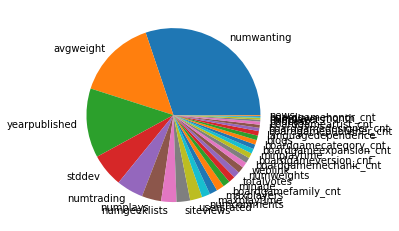

In [11]:
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance],normalize=True)
plt.show()

In [12]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 1.00000
Testing Data Score: 0.27251


In [13]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
dtr_feature_importance

[(0.29934425139441173, 'numwanting'),
 (0.147560999379328, 'avgweight'),
 (0.13240471983443738, 'yearpublished'),
 (0.061252703119189865, 'stddev'),
 (0.048467588295136664, 'numtrading'),
 (0.03343270544345069, 'numplays'),
 (0.03167195839115352, 'numgeeklists'),
 (0.025736796128088033, 'siteviews'),
 (0.02475508568732038, 'usersrated'),
 (0.02239132535104803, 'maxplayers'),
 (0.02155681041808885, 'numcomments'),
 (0.015298444810848532, 'totalvotes'),
 (0.012016920482714055, 'minage'),
 (0.010975434154711585, 'minplaytime'),
 (0.010838637280888103, 'boardgameexpansion_cnt'),
 (0.01051549917334576, 'boardgameversion_cnt'),
 (0.00996326953373711, 'boardgamefamily_cnt'),
 (0.009659154080908904, 'maxplaytime'),
 (0.00899638183534984, 'numweights'),
 (0.00825441093859485, 'boardgamecategory_cnt'),
 (0.007447270479039107, 'languagedependence'),
 (0.007205626684682156, 'blogs'),
 (0.006658771635285555, 'boardgamemechanic_cnt'),
 (0.005888859627489743, 'weblink'),
 (0.005362205922211984, 'boar

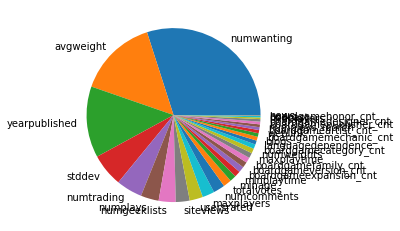

In [14]:
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance],normalize=True)
plt.show()